# Práctico 2 Procesamiento de Imágenes


***

## Grupo Cromático:  
- Clara Quintana	30899597  
- Belen Casalotti	32772856  
- Leandro Bognino	36887290  

## Profesor:  
- Claudio Delrieux  
  Laboratorio de Ciencias de las Imágenes – UNS -CONICET  
  cad@uns.edu.ar

___

### Dependencias e inclusión de librerías

In [1]:
!pip install pillow

In [1]:
from PIL import Image
import numpy as np
#import cv2
from matplotlib import pyplot as plt
from matplotlib import cm

# Ejercicio 2

## Ejercicio 2.1  
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:

- 1 Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.  
- 2 Detectores de bordes: Laplacianov4, Sobel4 orientaciones.  
- 3 Pasabanda.  

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma-temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kerneles 3x3y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

### 0. Lectura de imagen

In [2]:
im = Image.open("edificios.jpg")
print (im.size, im.mode, im.format)

(880, 660) RGB JPEG


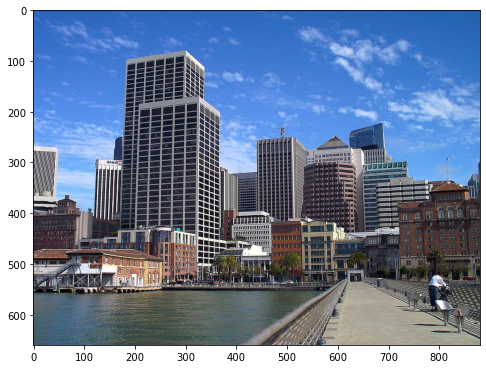

In [3]:
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()

### 1. Normalizar los valores de RGB del pixel 

In [4]:
im_np = np.asarray(im)

In [5]:
im_np = im_np/256

### 2. RGB -> YIQ

In [6]:
RGB_2_YIQ_MATRIX = np.array([[ 0.299, 0.587, 0.114], 
                          [ 0.595716, -0.274453, -0.321263], 
                          [ 0.211456, -0.522591, 0.311135]])

YIQ_2_RGB_MATRIX = np.array([[1, 0.9663, 0.6210], 
                          [1, -0.2721, -0.6474], 
                          [1, -1.1070, 1.7046]])

In [7]:
def rgb_yiq(im_np, source='yiq'):
    im_yiq =  np.copy(im_np)
    for i in range(len(im_np)):
        for j in range(len(im_np[0])):
            if (source == 'rgb'):
                im_yiq[i][j] = RGB_2_YIQ_MATRIX.dot(im_np[i][j])
            else:
                im_yiq[i][j] = YIQ_2_RGB_MATRIX.dot(im_np[i][j])
    return im_yiq

#im_yiq = RGB_2_YIQ_MATRIX.dot(im_np)

### 3. Función de Filtrado

In [8]:
def filter_image(image, kernel):
    imagen_filtrada = np.copy(image)
    imagen_con_borde = np.pad(np.copy(image), pad_width=int(len(kernel)/2), mode='reflect')
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            block = imagen_con_borde[i:i+len(kernel), j:j+len(kernel)]
            block = block* kernel
            block = block.sum() 
            if (kernel.sum() != 0):
                block = block / kernel.sum()
            if (block > 1):
                block = 1.
            if block < 0:
                block = 0.
            imagen_filtrada[i][j] = block
    return imagen_filtrada

### Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5

In [9]:
kernel_plano = np.array([[ 1/9, 1/9, 1/9], 
                        [  1/9, 1/9, 1/9], 
                        [  1/9, 1/9, 1/9]])

kernel_Bartlett = np.array([[ 1/16, 2/16, 1/16], 
                        [     2/16, 4/16, 2/16], 
                        [     1/16, 2/16, 1/16]])

kernel_Gaussiano = np.array([[ 1/256,  4/256,  6/256,  4/256,1/256], 
                        [      4/256, 16/256, 24/256, 16/256, 4/256], 
                        [      7/256, 24/256, 36/256, 24/256, 7/256], 
                        [      4/256, 16/256, 24/256, 16/256, 4/256], 
                        [      1/256,  4/256,  7/256,  4/256, 1/256]])

In [10]:
# Filtro Plano

im_yiq = rgb_yiq(im_np,source='rgb')
im_transf = filter_image(im_yiq[:,:,0],kernel_plano)

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

image_rgb_plano = Image.fromarray(np.uint8(image_rgb*255))

# Filtro Bartlett 3x3

im_yiq = rgb_yiq(im_np,source='rgb')
im_transf = filter_image(im_yiq[:,:,0],kernel_Bartlett)

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

image_rgb_Bartlett = Image.fromarray(np.uint8(image_rgb*255))


# Filtro Gaussiano 5x5 - Sigma = 1

im_yiq = rgb_yiq(im_np,source='rgb')
im_transf = filter_image(im_yiq[:,:,0],kernel_Gaussiano)

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

image_rgb_Gaussiano = Image.fromarray(np.uint8(image_rgb*255))

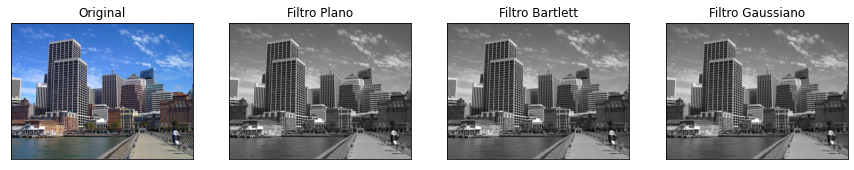

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(im)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Filtro Plano')
ax2.imshow(image_rgb_plano)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Filtro Bartlett')
ax3.imshow(image_rgb_Bartlett)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4.set_title('Filtro Gaussiano')
ax4.imshow(image_rgb_Gaussiano)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)


### Detectores de bordes: Laplacianov4, Sobel4 orientaciones

In [12]:
kernel_Laplaciano = np.array([[ 0, -1, 0], 
                        [ -1, 4, -1], 
                        [ 0, -1, 0]])

kernel_sobel = np.array([[ -1, 0, 1], 
                        [ -2, 0, 2], 
                        [ -1, 0, 1]])

In [13]:
# Filtro Laplaciano

im_yiq = rgb_yiq(im_np,source='rgb')
im_transf = filter_image(im_yiq[:,:,0],kernel_Laplaciano)

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

image_rgb_Laplaciano = Image.fromarray(np.uint8(image_rgb*255))

# Filtro sobel

im_yiq = rgb_yiq(im_np,source='rgb')
im_transf = filter_image(im_yiq[:,:,0],kernel_sobel)

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb_s =  rgb_yiq(im_yiq,source='yiq')

image_rgb_sobel = Image.fromarray(np.uint8(image_rgb_s*255))


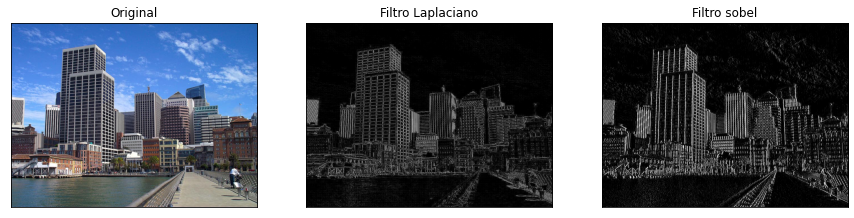

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(im)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Filtro Laplaciano')
ax2.imshow(image_rgb_Laplaciano)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Filtro sobel')
ax3.imshow(image_rgb_sobel)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)




### Pasabanda (DOG: Difference of Gaussians)

In [15]:
kernel_Gaussiano_3x3 = np.array([[ 0,    0,    0,    0, 0], 
                        [      0, 1/16, 2/16, 1/16, 0], 
                        [      0, 2/16, 4/16, 2/16, 0], 
                        [      0, 1/16, 2/16, 1/16, 0], 
                        [      0,    0,    0,    0, 0]])
 
kernel_Gaussiano_5x5 = np.array([[ 1/256,  4/256,  6/256,  4/256,1/256], 
                        [      4/256, 16/256, 24/256, 16/256, 4/256], 
                        [      7/256, 24/256, 36/256, 24/256, 7/256], 
                        [      4/256, 16/256, 24/256, 16/256, 4/256], 
                        [      1/256,  4/256,  7/256,  4/256, 1/256]])

kernel_Pasabanda = kernel_Gaussiano_5x5 - kernel_Gaussiano_3x3

In [16]:
# Filtro Pasabanda

im_yiq = rgb_yiq(im_np,source='rgb')
im_transf = filter_image(im_yiq[:,:,0],kernel_Pasabanda)

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

image_rgb_Pasabanda = Image.fromarray(np.uint8(image_rgb*255))


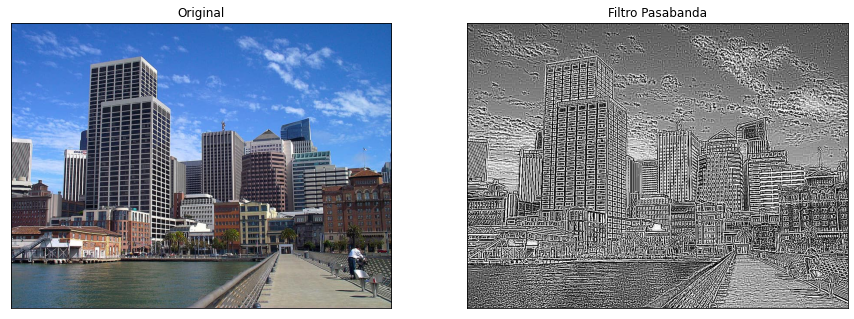

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(im)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Filtro Pasabanda')
ax2.imshow(image_rgb_Pasabanda)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)


## Ejercicio 2.2

Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat

Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

### Erosión

In [18]:
def erosion_image(image):
    imagen_filtrada = np.copy(image)
    imagen_con_borde = np.pad(np.copy(image), pad_width=1, mode='reflect')
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            block = imagen_con_borde[i:i+3, j:j+3]
            block = np.amin(block)
            imagen_filtrada[i][j] = block
    return imagen_filtrada

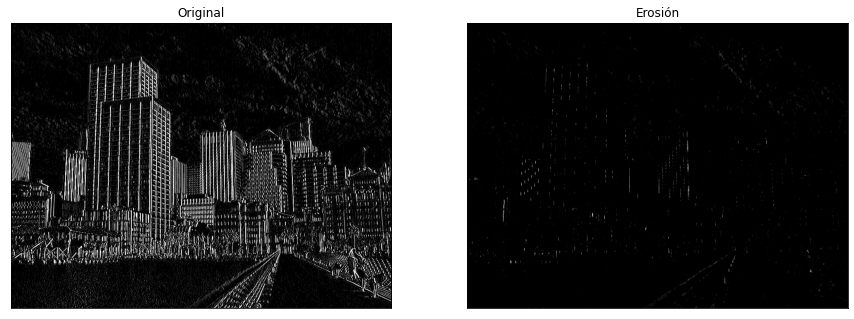

In [19]:
# Erosión 

image = image_rgb_s  #(usamos imagen del filtro de Sobel)

im_transf = erosion_image(image[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

image_rgb_erosion = Image.fromarray(np.uint8(image_rgb*255))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(image)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Erosión')
ax2.imshow(image_rgb_erosion)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)


### Dilatación

In [20]:
def dilatacion_image(image):
    imagen_filtrada = np.copy(image)
    imagen_con_borde = np.pad(np.copy(image), pad_width=1, mode='reflect')
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            block = imagen_con_borde[i:i+3, j:j+3]
            block = np.amax(block)
            imagen_filtrada[i][j] = block
    return imagen_filtrada

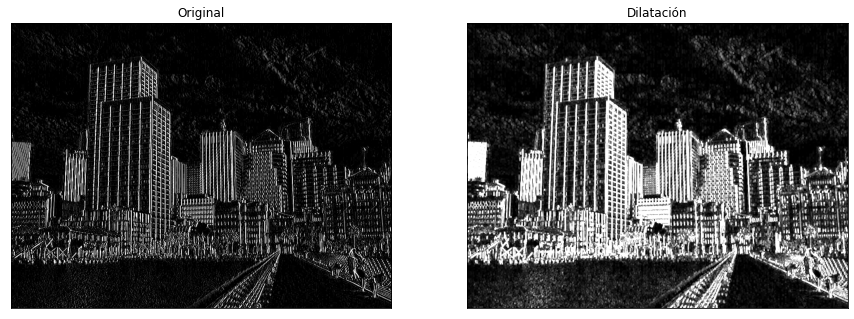

In [21]:
# Dilatación 

image = image_rgb_s  #(usamos imagen del filtro de Sobel)
im_transf = dilatacion_image(image[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

image_rgb_dilatacion = Image.fromarray(np.uint8(image_rgb*255))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(image)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Dilatación')
ax2.imshow(image_rgb_dilatacion)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)



### Apertura (Erosión + Dilatación)

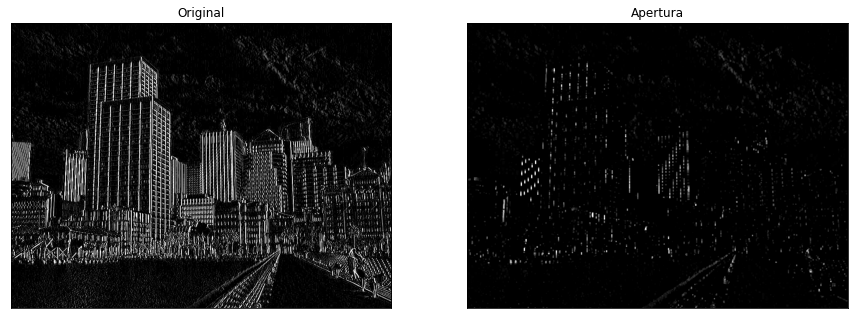

In [22]:
# Erosión 

image = image_rgb_s  #(usamos imagen del filtro de Sobel)

im_transf = erosion_image(image[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0

image_e =  rgb_yiq(im_yiq,source='yiq')

# Dilatación 

im_transf = dilatacion_image(image_e[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

#

image_rgb_apertura = Image.fromarray(np.uint8(image_rgb*255))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(image)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Apertura')
ax2.imshow(image_rgb_apertura)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)


### Cierre (Dilatación + Erosión)

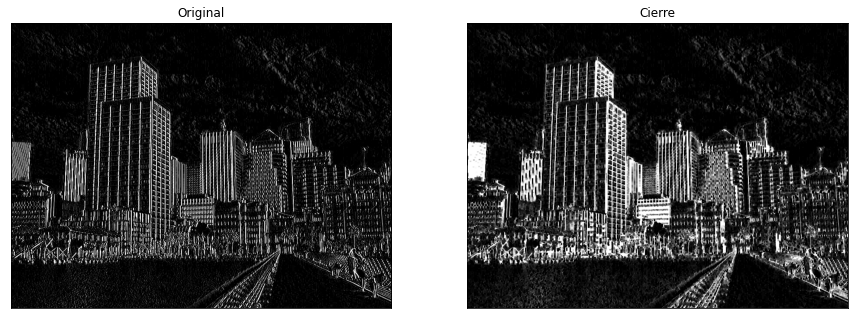

In [23]:
# Dilatación  

image = image_rgb_s  #(usamos imagen del filtro de Sobel)

im_transf = dilatacion_image(image[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0

image_d =  rgb_yiq(im_yiq,source='yiq')

# Erosión  

im_transf = erosion_image(image_d[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

#

image_rgb_cierre = Image.fromarray(np.uint8(image_rgb*255))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(image)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Cierre')
ax2.imshow(image_rgb_cierre)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)



### Borde morfológico (Original - Erosión)

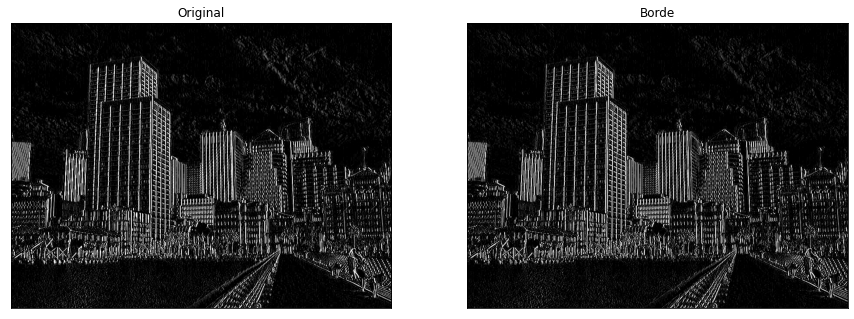

In [24]:
# Erosión 

image = image_rgb_s  #(usamos imagen del filtro de Sobel)

im_transf = erosion_image(image[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb_erosion =  rgb_yiq(im_yiq,source='yiq')

# Resta

image_rgb = image - image_rgb_erosion

image_rgb_borde = Image.fromarray(np.uint8(image_rgb*255))



fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(image)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Borde')
ax2.imshow(image_rgb_borde)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)



### Mediana

In [25]:
def mediana_image(image):
    imagen_filtrada = np.copy(image)
    imagen_con_borde = np.pad(np.copy(image), pad_width=1, mode='reflect')
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            block = imagen_con_borde[i:i+3, j:j+3]
            block = np.median(block)
            imagen_filtrada[i][j] = block
    return imagen_filtrada

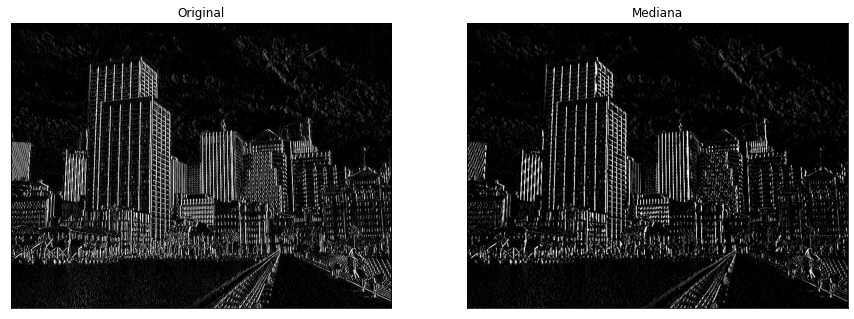

In [26]:
# Mediana

image = image_rgb_s  #(usamos imagen del filtro de Sobel)

im_transf = mediana_image(image[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb =  rgb_yiq(im_yiq,source='yiq')

image_rgb_mediana = Image.fromarray(np.uint8(image_rgb*255))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(image)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Mediana')
ax2.imshow(image_rgb_mediana)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

### Top Hat Blanca (Original - Apertura)

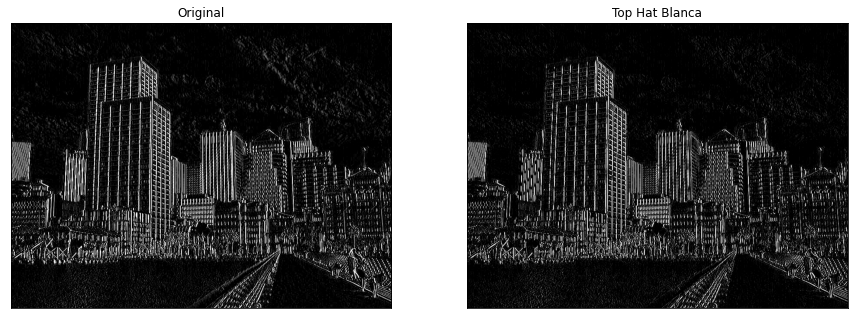

In [27]:
# Erosión 

image = image_rgb_s  #(usamos imagen del filtro de Sobel)

im_transf = erosion_image(image[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0

image_e =  rgb_yiq(im_yiq,source='yiq')

# Dilatación 

im_transf = dilatacion_image(image_e[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb_apertura =  rgb_yiq(im_yiq,source='yiq')

# Resta

image_rgb = image - image_rgb_apertura

#
image_rgb_THB = Image.fromarray(np.uint8(image_rgb*255))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(image)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Top Hat Blanca')
ax2.imshow(image_rgb_THB)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)



### Top Hat Negra (Cierre - Original)¶

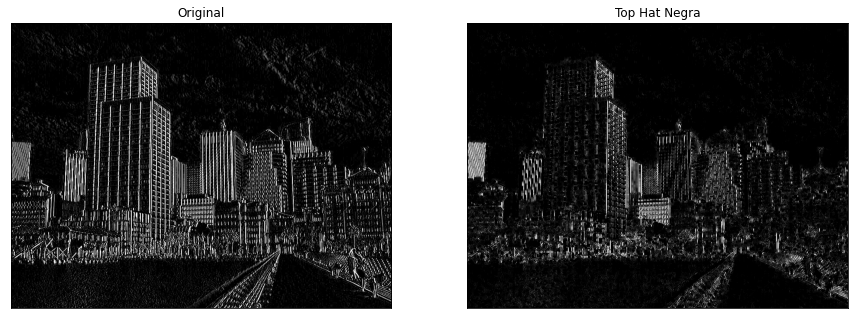

In [29]:
# Dilatación  

image = image_rgb_s  #(usamos imagen del filtro de Sobel)

im_transf = dilatacion_image(image[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0

image_d =  rgb_yiq(im_yiq,source='yiq')

# Erosión  

im_transf = erosion_image(image_d[:,:,0])

im_yiq[:,:,0] = im_transf
im_yiq[:,:,1] = 0
im_yiq[:,:,2] = 0
image_rgb_cierre =  rgb_yiq(im_yiq,source='yiq')

# Resta

image_rgb = image_rgb_cierre - image

#
image_rgb_THN = Image.fromarray(np.uint8(image_rgb*255))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    
ax1.set_title('Original')
ax1.imshow(image)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Top Hat Negra')
ax2.imshow(image_rgb_THN)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)


